<a href="https://colab.research.google.com/github/S-MANU/Data-Sets/blob/main/Netflix_data_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Name: Netflix Movies and TV Shows Clustering

Project Type - EDA/Regression/Classification/Unsupervised

Contribuation - Individual

Member        - Manu.S

## Project Summary

Netflix Movies and TV-shows Segmentation is the unsupervised Machine Learning problem. Lets first do the analysing and clustering process. Lets first understand the basic information of this dataset. After that I start the data wrangling part and data preprocessing part. First I converted the default date feature object to the pandas datatime object so that I can easily use that feature for future purposes as datetime for many predefinedmethods to specifically work with date.

Next I didn't handled the missing values in the dataset, because the missing values are so less so that we did EDA which didn't make any deferences. Next is I am going to use the text based feature that is 'Description' to train machine learning model. That's why I didn't focused on the missing values majorly.

The next step is text preprocessing, before making this feature into meaningful multi-dimensional vector, I need to do some steps include changing to lowercase, then removal of punctual, stopping words and extra white spacesetc..

In the end I used the TfidVector to change the text data into numerical, I chose 400 as the maximum feature so each observation will change into 400 length features.

After converting these vectors the next step is building clustering machine learning models. I tried three different models, the first one is K-means, then I tried Hierarchical Clustering and finally DBSCAN algorithm.

## Git Hub Link

## Problem Statement

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. We need to do:

Exploratory Data Analysis

Understanding what type of content is available in different countries

Is Netflix has oncreasingly focusing on TV rather than movies in recent years.

Clustering similar content by matching text-based features

Let's Begin

##Import libraries

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings

#text preprocessing libraries
import contractions
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer



from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.compose import make_column_transformer


#avoid warnings
warnings.filterwarnings("ignore")

Data Loading

In [ ]:
#Load csv file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/The Final Submission/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
print('Total Rows:',df.shape[0])
print('Total Columns:',df.shape[1])

Total Rows: 7787
Total Columns: 12


Data information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Duplicate Values

In [ ]:
sum(df.duplicated(keep = 'first'))

0

Null Values

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

What did you learned about the dataset ?


I have a Netflix movies and show data set which is unsupervised machine learning project, which means we don't have any target variable. This dataset contains 12 columns and 7787 rows. We removed the duplicated observation which had. It has some categorical, Text(Description) and numbers also. We are encountering NaN values of director, cast country and date_added.

## Understanding The Variables

In [ ]:
#dataset columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# describe
df.describe(include ='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


Variable Description:

show_id -> It is a Unique ID and is not usefull.

type  -> This tells us whether it is movies or a tv show.

title  -> This is a title of the movie or a show.

director -> Name of the director for each movie or tv show.

cast -> information of cast.

country -> Name of the country where movie or show belongs to.

date_added -> Added date on netflix.

release_year -> the date which actually released.

rating -> tv rating of the show


Checking unique values for each variables

In [ ]:
# Let create a function to print all columns unique values
def unique_counts(df1):
  counts = df1.apply(lambda x: x.nunique())
  print(counts)

In [ ]:
unique_counts(df)

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64


# Data Wrangling

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7627,s7628,Movie,Willy and the Guardians of the Lake: Tales fro...,Zsolt Pálfi,"Csongor Szalay, Anna Kubik, Sári Vida, András ...",Hungary,"March 27, 2020",2019,TV-Y,72 min,Children & Family Movies,"As winter approaches the lake, a common threat..."
6923,s6924,Movie,The Texas Chainsaw Massacre,Tobe Hooper,"Gunnar Hansen, Jim Siedow, Marilyn Burns, Edwi...",United States,"October 22, 2019",1974,R,83 min,"Cult Movies, Horror Movies, Independent Movies",When some friends visit a vandalized graveyard...
2611,s2612,Movie,Happy Hunting,"Joe Dietsch, Louie Gibson","Martin Dingle-Wall, Ken Lally, Kenny Wormald, ...",United States,"January 1, 2018",2017,TV-MA,91 min,"Horror Movies, Independent Movies","On the run from his meth-dealing employers, a ..."
5523,s5524,Movie,Sex Drive,Sean Anders,"Josh Zuckerman, Amanda Crew, Clark Duke, Seth ...",United States,"September 1, 2020",2008,R,109 min,Comedies,"Eager to hook up with a woman he met online, 1..."
4742,s4743,Movie,Paint It Black,Amber Tamblyn,"Alia Shawkat, Janet McTeer, Rhys Wakefield, Al...",United States,"February 1, 2018",2016,R,96 min,Dramas,"In the wake of a young artist’s suicide, his p..."


Lets change date_added feature to pandas datetime

In [ ]:
# creating a function toconvert datetime
def handle_date_added(date_added_values):
  return pd.to_datetime(date_added_values, errors = 'coerce') # coerce parameter simplifies the handling of missing or invalid dates

In [ ]:
df['date_added'] = handle_date_added(df.date_added)

In [ ]:
# Lets split the values in the cast column by commas
df['cast'] = df['cast'].apply(lambda x: np.nan if pd.isna(x) else x.split(',') )

What manipulation have done and insights we found?

In this unsupervised data, we are going to use the most features for EDA and our goal is to cluster based on the text features and lets not going to spend much time on imputing Missing values. In wrangling I converted the date_added feature to pandas dataframe to use that feature effectively. Finally I changed the listed_in and cast to list so that so that we can use that in EDA little more easily.

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"[Elijah Wood, John C. Reilly, Jennifer Conne...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Data Visualisation, Story Telling and Experimenting with Charts: Understand the Relation Between Variables.

Graph - 1

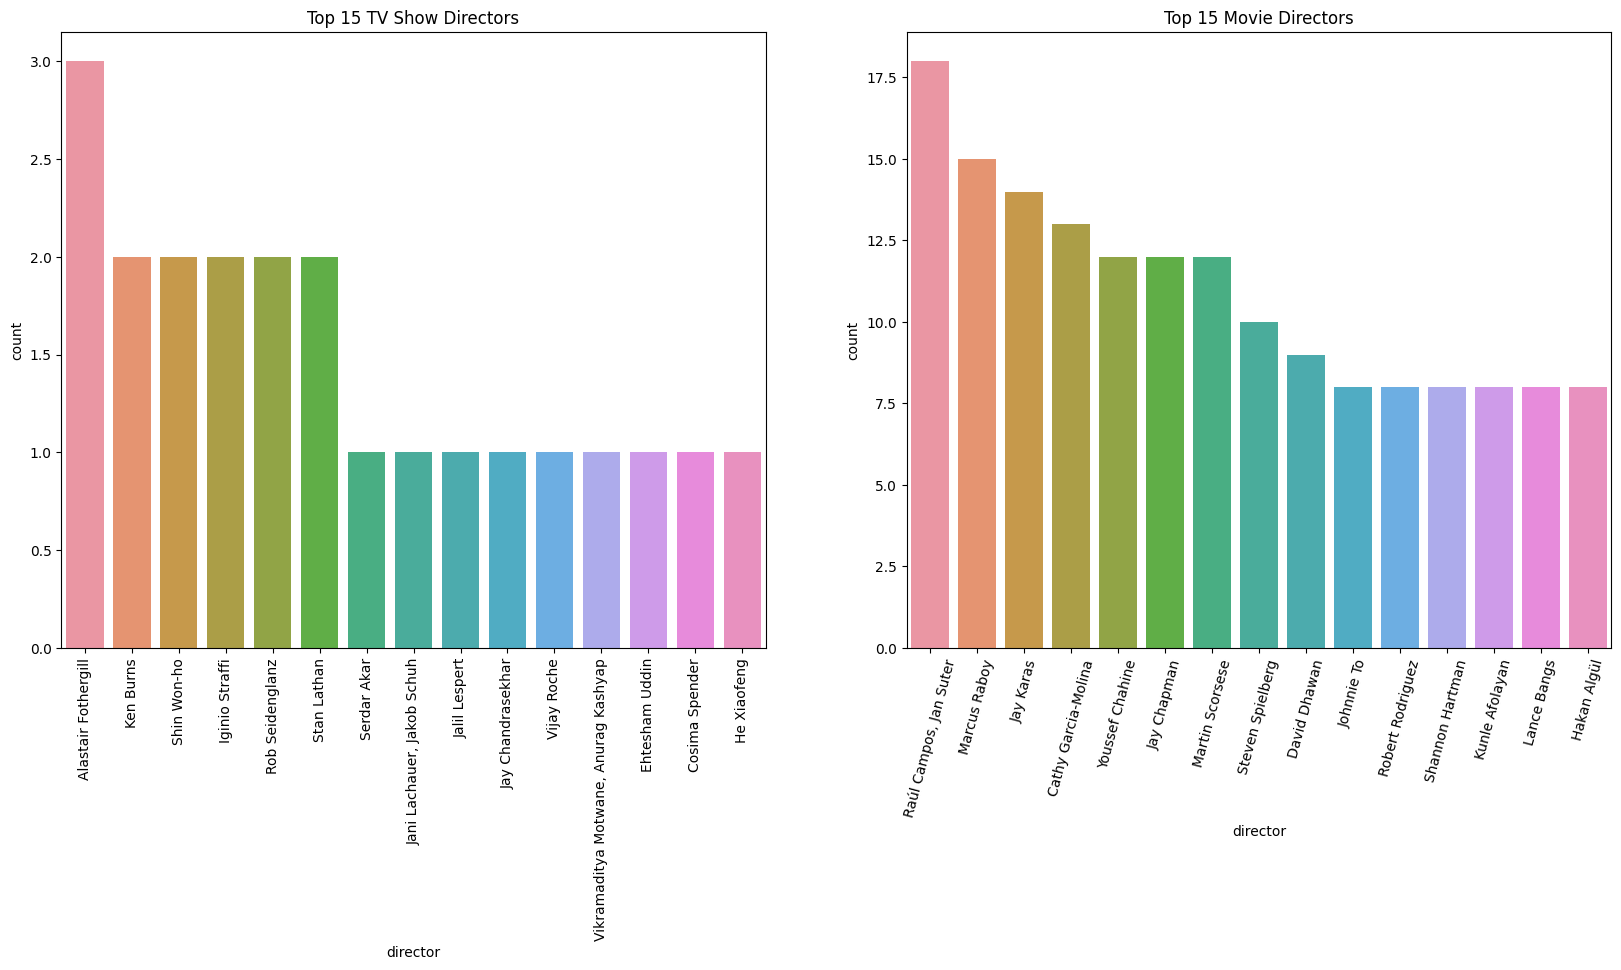

In [ ]:
# Filter the DataFrame for TV Shows and Movies
tv_show = df[df.type == 'TV Show']
movie = df[df.type == 'Movie']

# Set up the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Create count plots using Seaborn
sns.countplot(x='director', data=tv_show, order=tv_show['director'].value_counts().index[:15], ax=ax1)
sns.countplot(x='director', data=movie, order=movie['director'].value_counts().index[:15], ax=ax2)

# Set titles for the subplots
ax1.set_title('Top 15 TV Show Directors')
ax2.set_title('Top 15 Movie Directors')

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=75)

# Display the plots
plt.show()

The insights from the graph:

Alastaie Fothergill directed most of the TV shows, as total count 3. Raul Campos directed the most of the films as total count 18.

Graph - 2

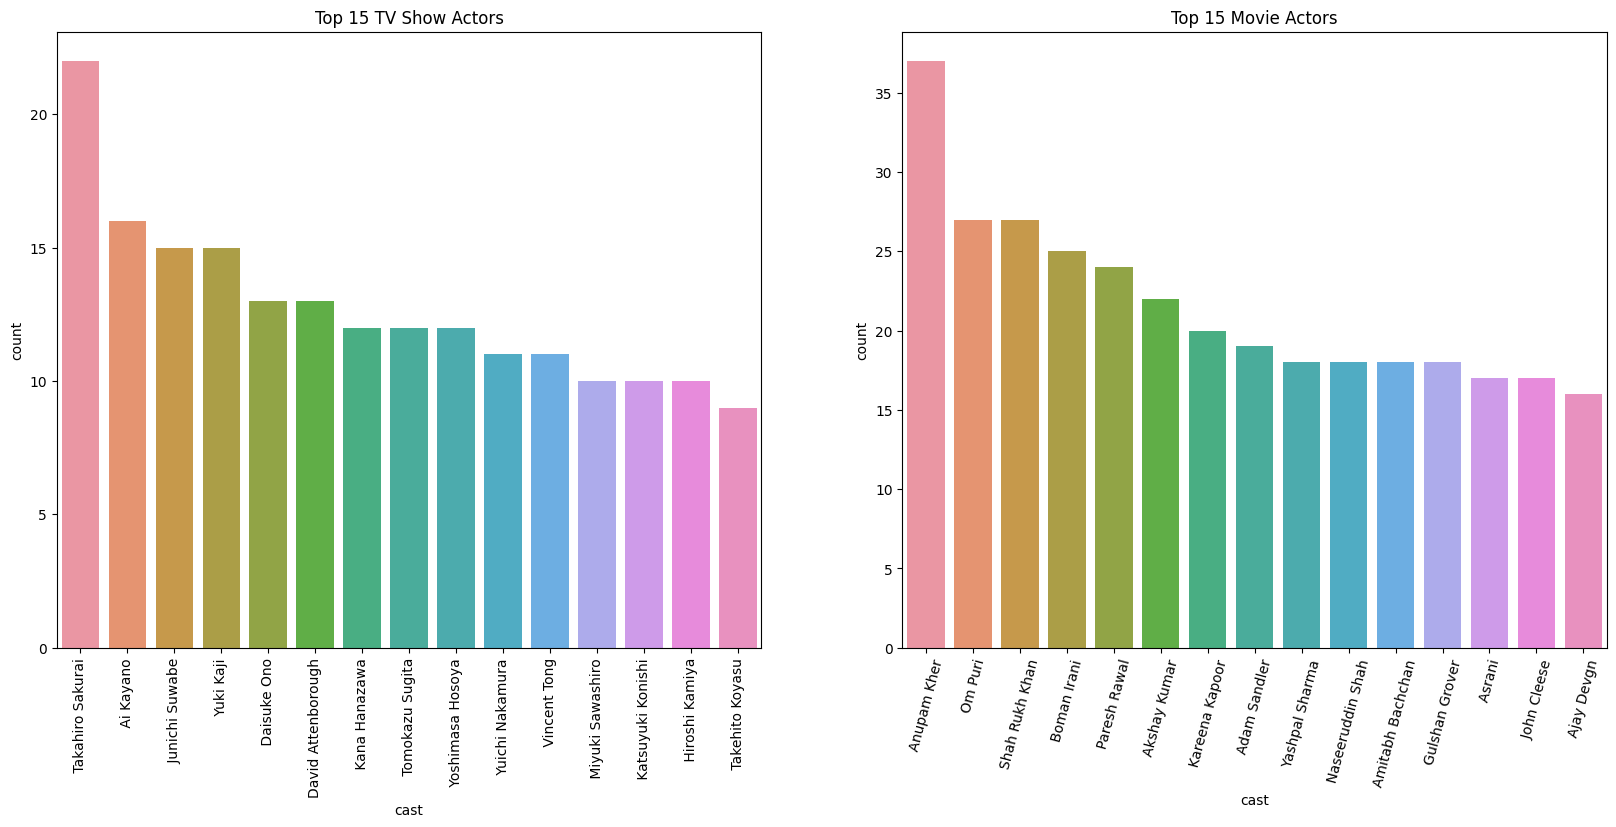

In [ ]:
# Use explode to handle lists of cast members
tv_show_cst = tv_show['cast'].explode().dropna()
movie_cst = movie['cast'].explode().dropna()

# Set up the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Create count plots using Seaborn
sns.countplot(x=tv_show_cst, order=tv_show_cst.value_counts().index[:15], ax=ax1)
sns.countplot(x=movie_cst, order=movie_cst.value_counts().index[:15], ax=ax2)

# Set titles for the subplots
ax1.set_title('Top 15 TV Show Actors')
ax2.set_title('Top 15 Movie Actors')

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=75)

# Display the plots
plt.show()


The insights:

Actor Takahiro Sakurai acted most number of tv shows in the dataset with total count of 25. Anupam Kher acted in most number movies with a count of 32.

Graph - 3

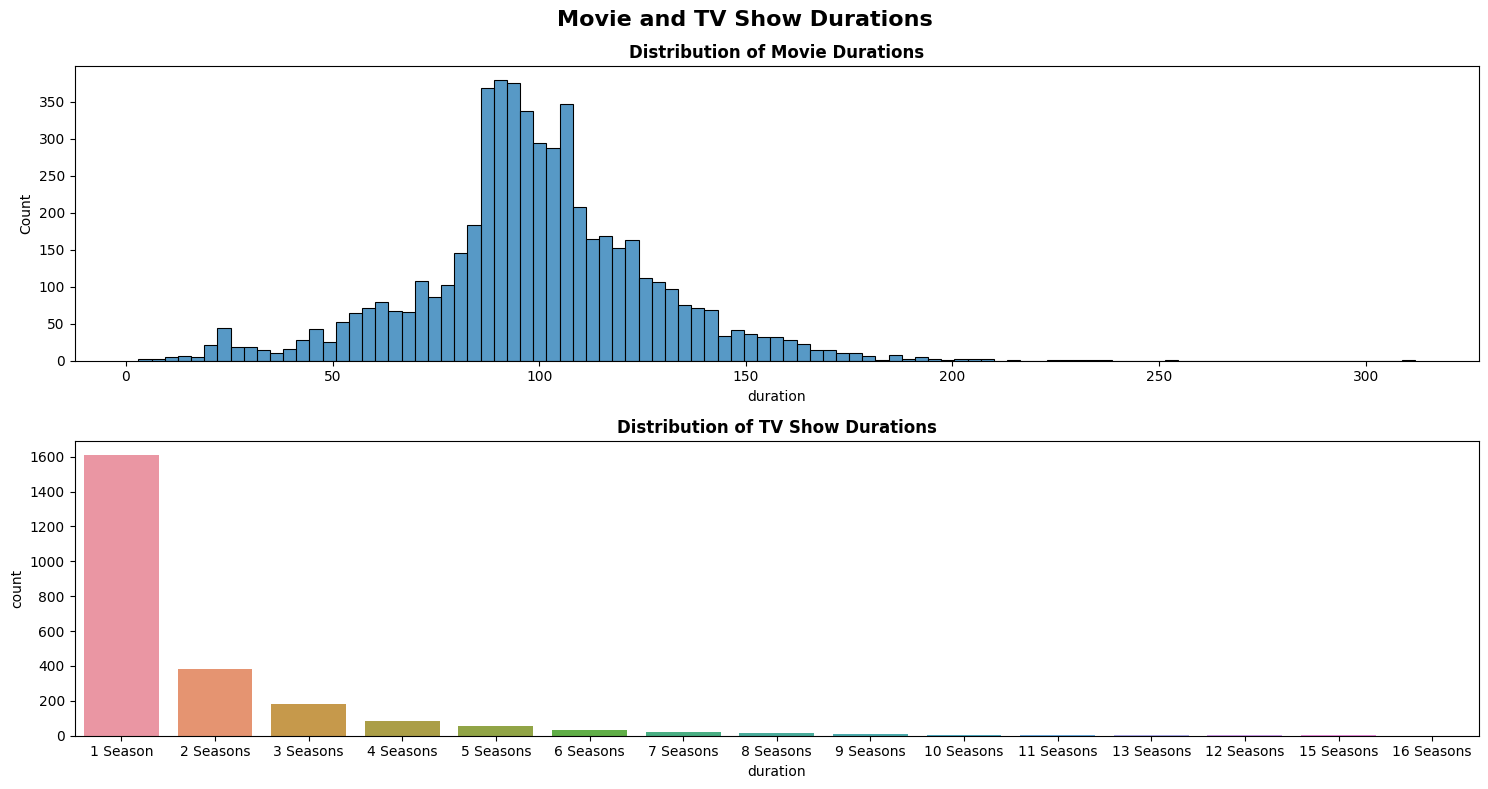

In [ ]:
# Checking the distribution of Movie Durations
plt.figure(figsize=(15, 8))

# Subplot 1: Distplot with Normal distribution for Movies
plt.subplot(2, 1, 1)
sns.histplot(movie['duration'].str.extract('(\d+)', expand=False).astype(float), kde=False)
plt.title('Distribution of Movie Durations', fontweight="bold")

# Subplot 2: Distribution of TV Shows duration
plt.subplot(2, 1, 2)
sns.countplot(x=tv_show['duration'], data=tv_show, order=tv_show['duration'].value_counts().index)
plt.title("Distribution of TV Show Durations", fontweight='bold')

# Add a main title to the entire figure
plt.suptitle('Movie and TV Show Durations', fontsize=16, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Insights:

1600 tv shows released only one season and most number movies duration was 800 minutes and it is normally distributed.

Graph - 4

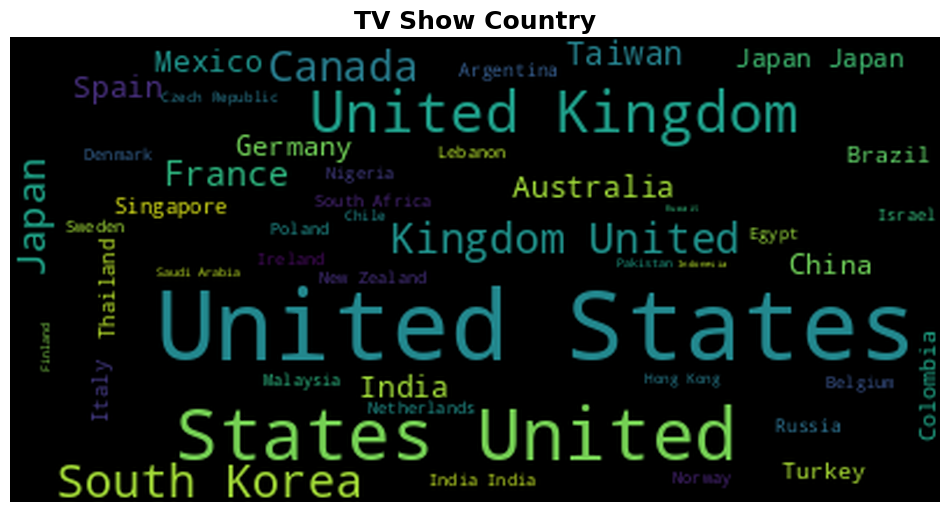

In [ ]:
# Checking the distribution of TV SHOWS
df_word_cloud = tv_show['country'].dropna()

# Generate WordCloud
wordcloud = WordCloud(background_color="black").generate(" ".join(df_word_cloud))

# Display the generated image
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='blackman')
plt.axis("off")
plt.title('TV Show Country', fontsize=18, fontweight='bold')

# Show the plot
plt.show()

Graph - 5

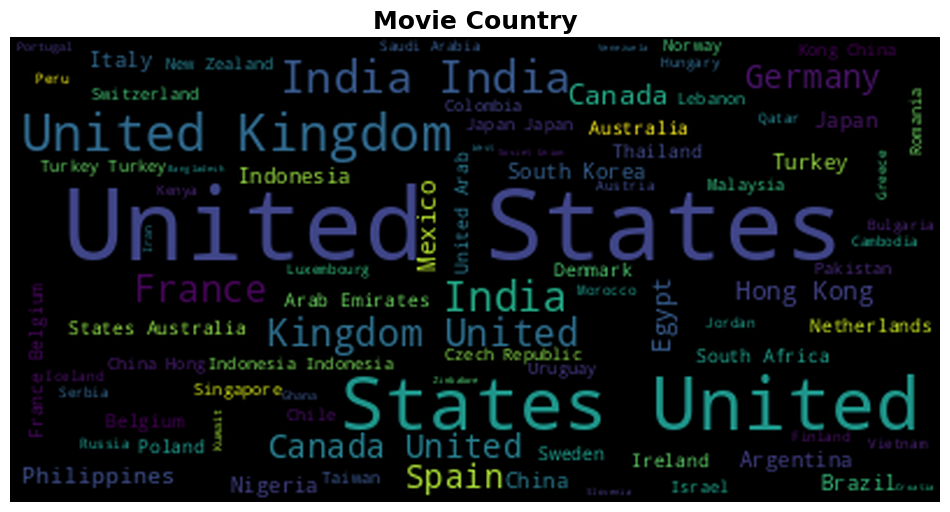

In [ ]:
# Checking the distribution of Movies
df_word_cloud = movie['country'].dropna()

# Generate WordCloud
wordcloud = WordCloud(background_color="black").generate_from_text(" ".join(df_word_cloud))

# Display the generated image
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='blackman')
plt.axis("off")
plt.title('Movie Country', fontsize=18, fontweight='bold')

# Show the plot
plt.show()

Insights:

Most number of Netflix TV_shows and Movies belongs to the United States. We can guess easily this because Netflix belongs to America so it will be their first preference.

Graph - 6

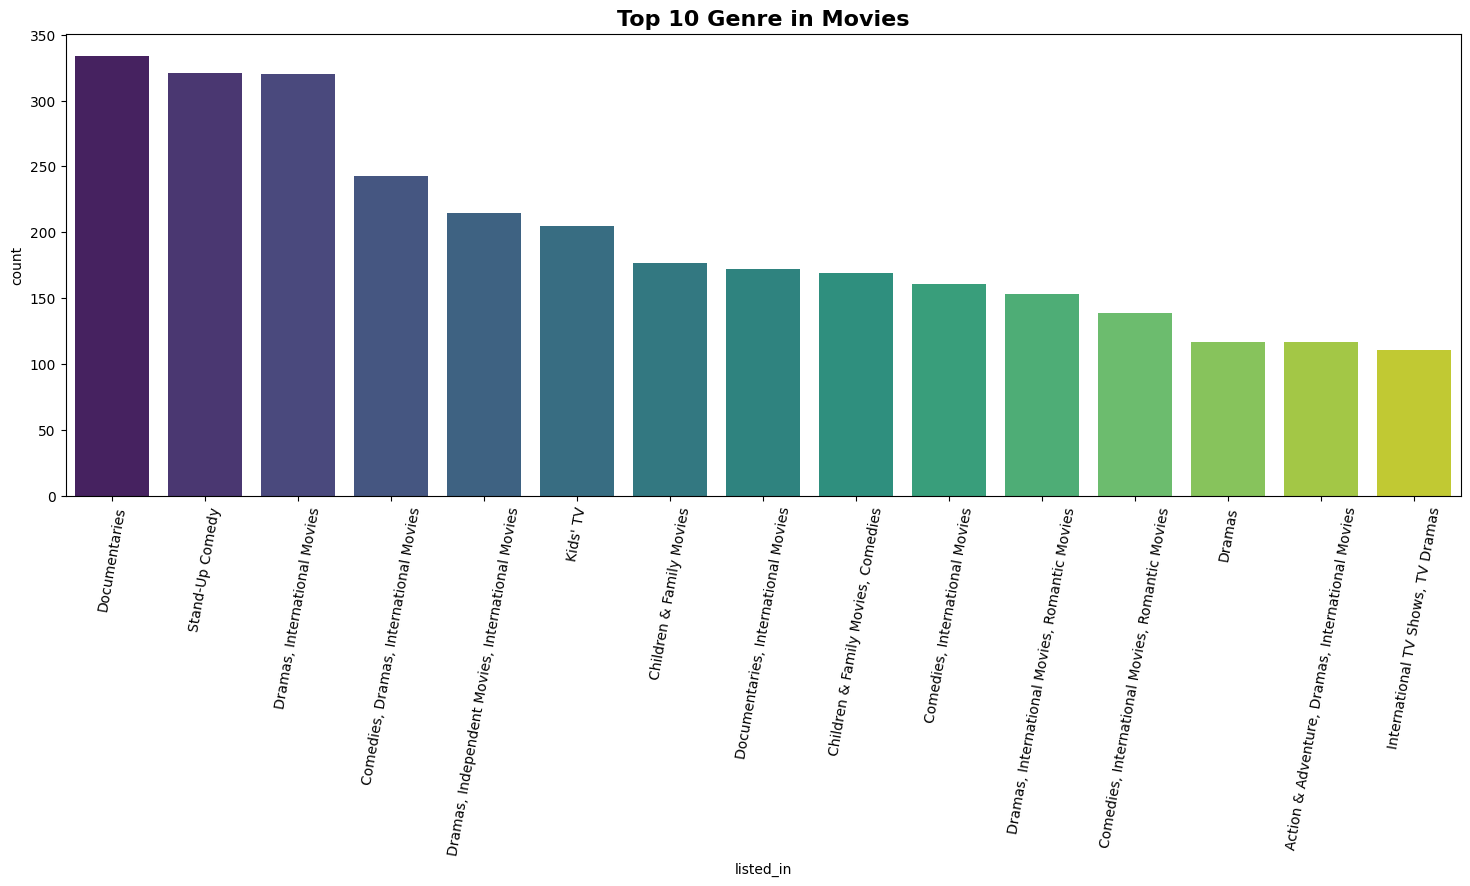

In [ ]:
# Top 10 Genre in movies
plt.figure(figsize=(18, 6))
sns.countplot(x=df["listed_in"], order=df["listed_in"].value_counts().head(15).index, palette="viridis")
plt.xticks(rotation=80)
plt.title("Top 10 Genre in Movies", size=16, fontweight="bold")
plt.show()

Insights

Documentaries, Stand-Up Comedy, Dramas, International Movies are most content available in Netflix.

Graph - 7

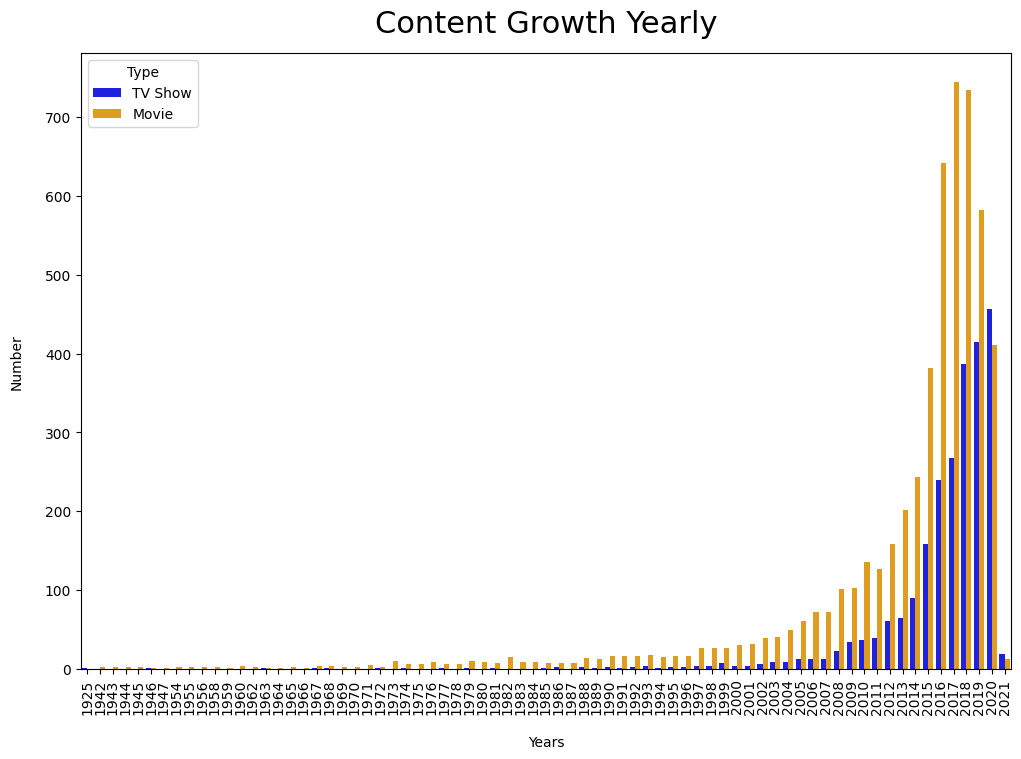

In [ ]:
# Separate movies and TV shows
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Plotting the content growth yearly
plt.figure(figsize=(12, 8))
sns.countplot(x='release_year', hue='type', data=df, palette={'Movie': 'orange', 'TV Show': 'blue'})
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Content Growth Yearly", y=1.02, fontsize=22)
plt.xticks(rotation=90)
plt.legend(title='Type', loc='upper left')
plt.show()

Netflix acheived its peak from 2017 to 2020. The reason behind is Corona. Most of the people was staying in the home that time and spend most of the time in streaming OTT apps. So this strategy was understood by netflix and started to give more contents to attract more subscribers.

Graph - 8

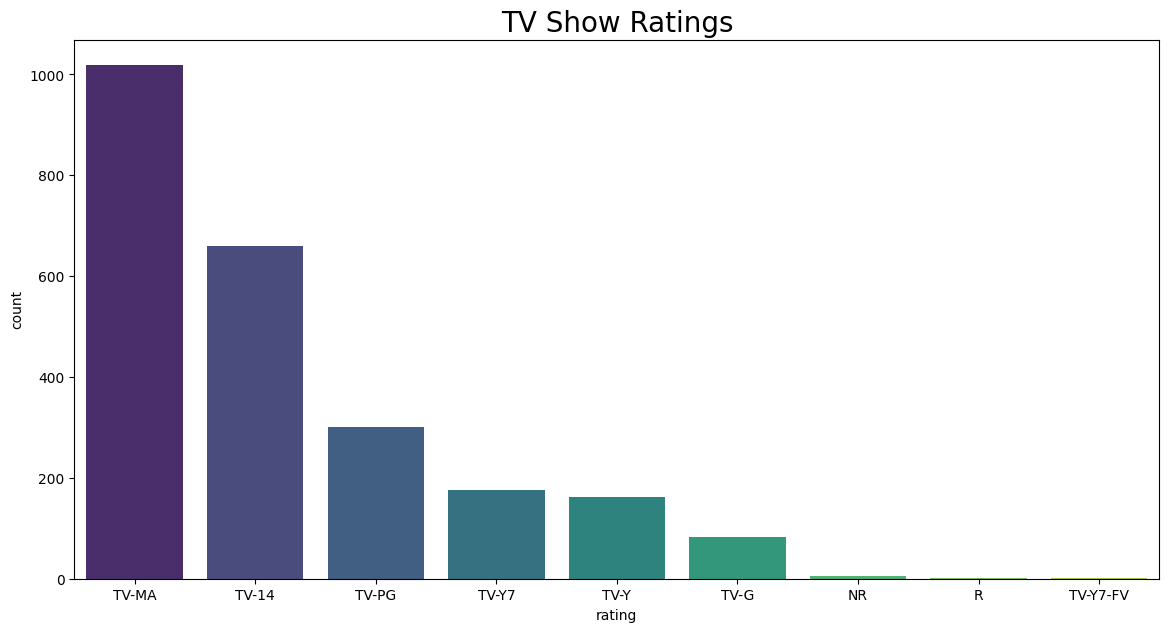

In [ ]:
# Countplot for TV show ratings
plt.figure(figsize=(14, 7))
sns.countplot(x='rating', data=tv_show, order=tv_show['rating'].value_counts().index, palette='viridis')
plt.title('TV Show Ratings', size=20)
plt.show()

Insights:

TV_MA rating contents are most in the Netflix, next place is TV-14.

Graph - 9

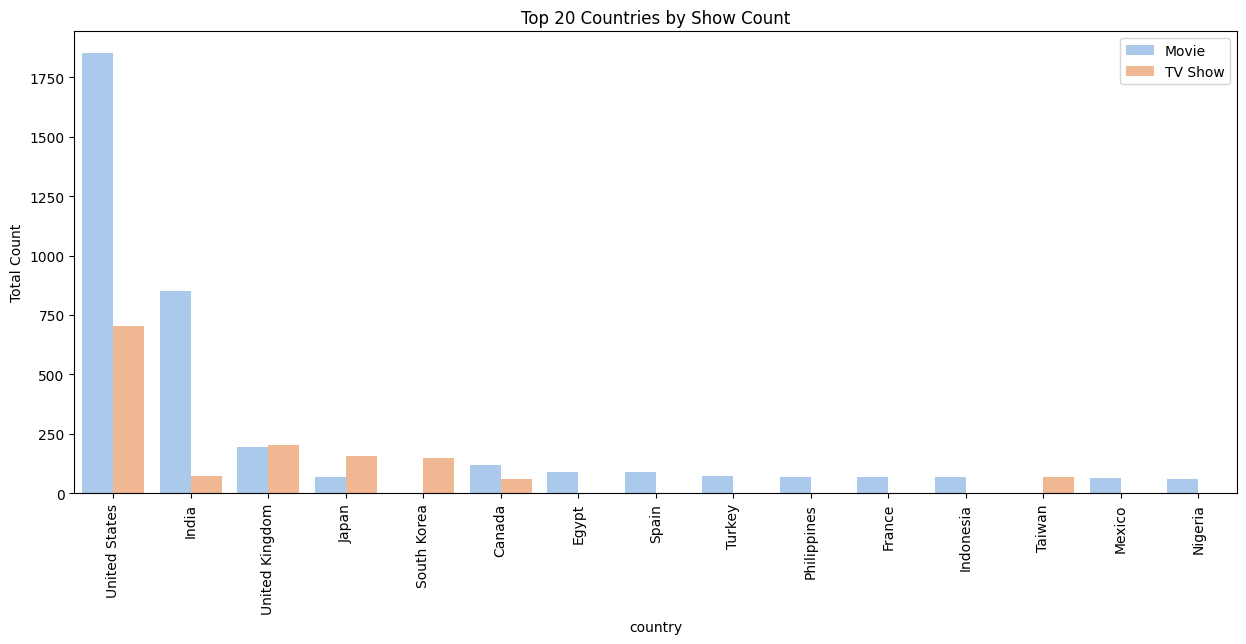

In [ ]:
#Tv shows and movies produced by different countries
# Group by country and type, count the number of shows, and sort
df_country = df.groupby(['country', 'type'])['show_id'].count().reset_index()
df_country = df_country.sort_values(by='show_id', ascending=False)

# Plot using Seaborn catplot
plt.figure(figsize=(15, 6))
sns.barplot(data=df_country.head(20), x='country', y='show_id', hue='type', palette='pastel')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.ylabel('Total Count')
plt.title('Top 20 Countries by Show Count')
plt.show()

Insights:

As we seen before Netflix has the United States of Movies and TV shows, second place is the Indian Movies and TV shows.

## Feature Engineering and Data Pre-Proccessing

1. Handling Missing Values

What all missing value imputation techniques have you used and why did you use those techniques?

The Description is the only features which I need for training ML model, and I don't have any missing values in the Description feature so there is no need to handle impute any missing values.

2. Categorical Encoding

What are all categorical encoding techniques have you used and why did you use those techniques?

I am going to handle only text data here so not going to take care other variables.


3. Textual data Preprocessing

(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

Expand Contraction.

In [ ]:
#decoding non-utf-8 characters
def remove_non_utf8_words(df,features_names):
    df = df.copy()
    for feature in features_names:
        df[feature] = df[feature].apply(lambda x : x.replace('â€™',"'"))
        df[feature] = df[feature].apply(lambda x : ''.join([c for c in x if ord(c) < 128]))
    return df

#decode('utf-8') is used to decode the encoded string back to UTF-8 format.

In [ ]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.4 MB/s eta 0:00:00


In [ ]:
import contractions

# Expand Contraction
def expand_contractions(df,feature_names):
    df = df.copy()
    for feature in feature_names:
        df[feature] = df[feature].apply(lambda x : " ".join(x.split()))
        df[feature] = df[feature].apply(lambda x : contractions.fix(x))
    return df

#The contractions.fix function is used directly to expand contractions in each cell of the specified features.

Lower Casing

In [ ]:
# Lower Casing
def change_to_lower_case(df,feature_names):
    df = df.copy()
    for feature in feature_names:
        df[feature] = df[feature].apply(lambda x : x.lower())
    return df

Remove Punctuations

In [ ]:
# Remove Punctuations
def remove_punctuations(df,features_columns):
    df = df.copy()
    punctuations = string.punctuation
    for feature in features_columns:
        df[feature] = df[feature].apply(lambda x : x.translate(str.maketrans('','',punctuations)))
    return df


Removing URL and Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
def remove_urls(df,feature_names):
    df = df.copy()
    for feature in feature_names:
        df[feature] = df[feature].apply(lambda x :  re.sub(r'^https?:\/\/.*[\r\n]*', '', x))
    return df

def remove_words_with_digits(df, feature_names):
    df = df.copy()
    for feature in feature_names:
        df[feature] = df[feature].apply(lambda x : " ".join(s for s in x.split() if not any(c.isdigit() for c in s)))
    return df

Tokenization and Text Normalization

In [ ]:
# Remove Stopwords
def remove_stopwords(df,features_names):
    df = df.copy()
    eng_stopwords = set(stopwords.words('english'))
    for feature in features_names:
        df[feature] = df[feature].apply(lambda text: " ".join(word for word in text.split() if not word in eng_stopwords))
    return df

In [ ]:
# Tokenization
def tokenize_and_normalization(df,feature_names):
    lemmatizer=WordNetLemmatizer()
    for feature in feature_names:
            df[feature] = df[feature].apply(lambda x :" ".join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

    return d

Which text normalization technique have you used and why?


I using Lemmatization normalization because it will do better than stemming. In stemming, there is chance that it will change the word completely. But in case of Lemmatization, it is not the case, it will try to maintain the original context of the sentence.

Text Vectorization

In [ ]:
class CustomTextDataPreprocessing(BaseEstimator,TransformerMixin):

    def __init__(self,feature_names):
        self.feature_names = feature_names
        return None

    #decoding non-utf-8 characters
    def remove_non_utf8_words(self,df,feature_names):
        df = df.copy()
        for feature in feature_names:
            df[feature] = df[feature].apply(lambda x : x.replace('â€™',"'"))
            df[feature] = df[feature].apply(lambda x : ''.join([c for c in x if ord(c) < 128]))
        return df

      # Expand Contraction
    def expand_contractions(self,df,feature_names):
        df = df.copy()
        for feature in feature_names:
            df[feature] = df[feature].apply(lambda x : " ".join(x.split()))
            df[feature] = df[feature].apply(lambda x : contractions.fix(x))
        return df

        # Lower Casing
    def change_to_lower_case(self,df,feature_names):
        df = df.copy()
        for feature in feature_names:
            df[feature] = df[feature].apply(lambda x : x.lower())
        return df

    # Remove Punctuations
    def remove_punctuations(self,df,features_names):
        df = df.copy()
        punctuations = string.punctuation
        for feature in features_names:
            df[feature] = df[feature].apply(lambda x : x.translate(str.maketrans('','',punctuations)))
        return df

    # Remove URLs & Remove words and digits contain digits
    def remove_urls(self,df,feature_names):
        df = df.copy()
        for feature in feature_names:
            df[feature] = df[feature].apply(lambda x :  re.sub(r'^https?:\/\/.*[\r\n]*', '', x))
        return df

    def remove_words_with_digits(self,df, feature_names):
        df = df.copy()
        for feature in feature_names:
            df[feature] = df[feature].apply(lambda x : " ".join(s for s in x.split() if not any(c.isdigit() for c in s)))
        return df

    # Remove Stopwords
    def remove_stopwords(self,df,feature_names):
        df = df.copy()
        eng_stopwords = set(stopwords.words('english'))
        for feature in feature_names:
            df[feature] = df[feature].apply(lambda text: " ".join(word for word in text.split() if not word in eng_stopwords))
        return df

    # Tokenization
    def tokenize_and_normalization(self,df,feature_names):
        lemmatizer=WordNetLemmatizer()
        for feature in feature_names:
            df[feature] = df[feature].apply(lambda x :" ".join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

        return df


    def fit(self,df):
        return self

    def transform(self,df):
        df =df.copy()
        #removing non utf8 words
        df = self.remove_non_utf8_words(df,self.feature_names)
        #expanding contractions
        df = self.expand_contractions(df,self.feature_names)
        #changing all to lower case
        df = self.change_to_lower_case(df,self.feature_names)
        #remvoing punctuations
        df = self.remove_punctuations(df,self.feature_names)
        #removing urls
        df = self.remove_urls(df,self.feature_names)
        #removing words with digits
        df = self.remove_words_with_digits(df,self.feature_names)
        #remove stopwords
        df = self.remove_stopwords(df,self.feature_names)
        #remove tokenize and normalization
        df = self.tokenize_and_normalization(df,self.feature_names)


        return df


In [ ]:
# Vectorizing Text
class CustomTfidVectorizer(BaseEstimator,TransformerMixin):
    def __init__(self,feature_name,max_features = None):
        self.max_features = max_features
        self.feature_name = feature_name
        return None

    def fit(self,df):
        self.TfidVectorizer = TfidfVectorizer(max_features= self.max_features)
        self.TfidVectorizer.fit(df[self.feature_name])
        return self

    def transform(self,df):
        df = df.copy()
        vectors = self.TfidVectorizer.transform(df[self.feature_name]).toarray()
        df[self.TfidVectorizer.get_feature_names()] = vectors
        df.drop(self.feature_name,axis = 1,inplace = True)
        return df

Which text vectorization technique have you used and why?

Term frequency-inverse document frequency (TF-IDF) gives a measure that takes the importance of a word into consideration depending on how frequency it occurs in a document and a corpus. Not like Bag of words and Count vector technique which treats all words equally, TF-IDF can distinguish very common words or rare words.

## ML Model Implementation

In [ ]:
import nltk

# Download multiple resources
nltk.download(['wordnet', 'punkt', 'stopwords'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#using pipeline to transform our text data
text_feature_pipeline = Pipeline([
    ('text_preprocessing',CustomTextDataPreprocessing(feature_names=['description'])),
    ('vectorization', CustomTfidfVectorizer(feature_name='description',max_features=400))
])

In [ ]:
description_feature_vector = text_feature_pipeline.fit_transform(df).iloc[:,11:]

In [ ]:
#printing the shapes of our data
print("Train data: ",description_feature_vector.shape)

Train data:  (7787, 398)


ML Model - 1

For n_clusters = 2, Silhouette score is 0.0056524820422096935
For n_clusters = 3, Silhouette score is 0.007216159901326781
For n_clusters = 4, Silhouette score is 0.009875950950757165
For n_clusters = 5, Silhouette score is 0.012210745235340123
For n_clusters = 6, Silhouette score is 0.01360916597827531
For n_clusters = 7, Silhouette score is 0.015391375319155303
For n_clusters = 8, Silhouette score is 0.016052552047913112
For n_clusters = 9, Silhouette score is 0.018030529959942816
For n_clusters = 10, Silhouette score is 0.017640183999941626
For n_clusters = 11, Silhouette score is 0.020864330786992454
For n_clusters = 12, Silhouette score is 0.02179552814575785
For n_clusters = 13, Silhouette score is 0.021022646619279974
For n_clusters = 14, Silhouette score is 0.022774336869294764


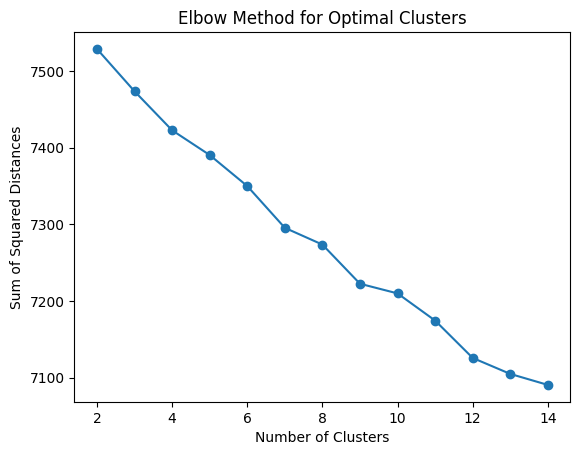

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Replace SEED with your actual seed value
SEED = 10

# Initialize an empty list to store sum of squared distances
ssd = []

# Initialize a range of clusters to test (e.g., from 2 to 14)
clusters_range = range(2, 15)

# Iterate over the clusters
for cluster in clusters_range:
    kmeans = KMeans(n_clusters=cluster, random_state=SEED)
    kmeans.fit(description_feature_vector)

    # Get the cluster assignments
    preds = kmeans.predict(description_feature_vector)

    # Calculate Silhouette score
    score = silhouette_score(description_feature_vector, preds)
    print(f"For n_clusters = {cluster}, Silhouette score is {score}")

    # Append the sum of squared distances to the list
    ssd.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(clusters_range, ssd, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


From the above Elbow Method and silhouette score I am choosing 12 would be the perfect number of clusters for this problem. So lets train kmeans with 12 clusters.

In [ ]:
# Initialize K-means model with the specified number of clusters
kmeans = KMeans(n_clusters=12, init='k-means++', random_state=SEED)

# Fit the model and get cluster assignments
y_predict = kmeans.fit_predict(description_feature_vector)

In [ ]:
# (replace them with your actual feature vector and cluster predictions)
score = silhouette_score(description_feature_vector, y_predict)

# Print the silhouette score
print("Silhouette score is {}".format(score))

Silhouette score is 0.02179552814575785


In [ ]:
# Replace n_components with the desired number of components
n_components = 3

# Initialize PCA with the specified number of components
pca = PCA(n_components=n_components)

# Fit and transform the feature vector to reduce its dimensionality
X = pca.fit_transform(description_feature_vector)

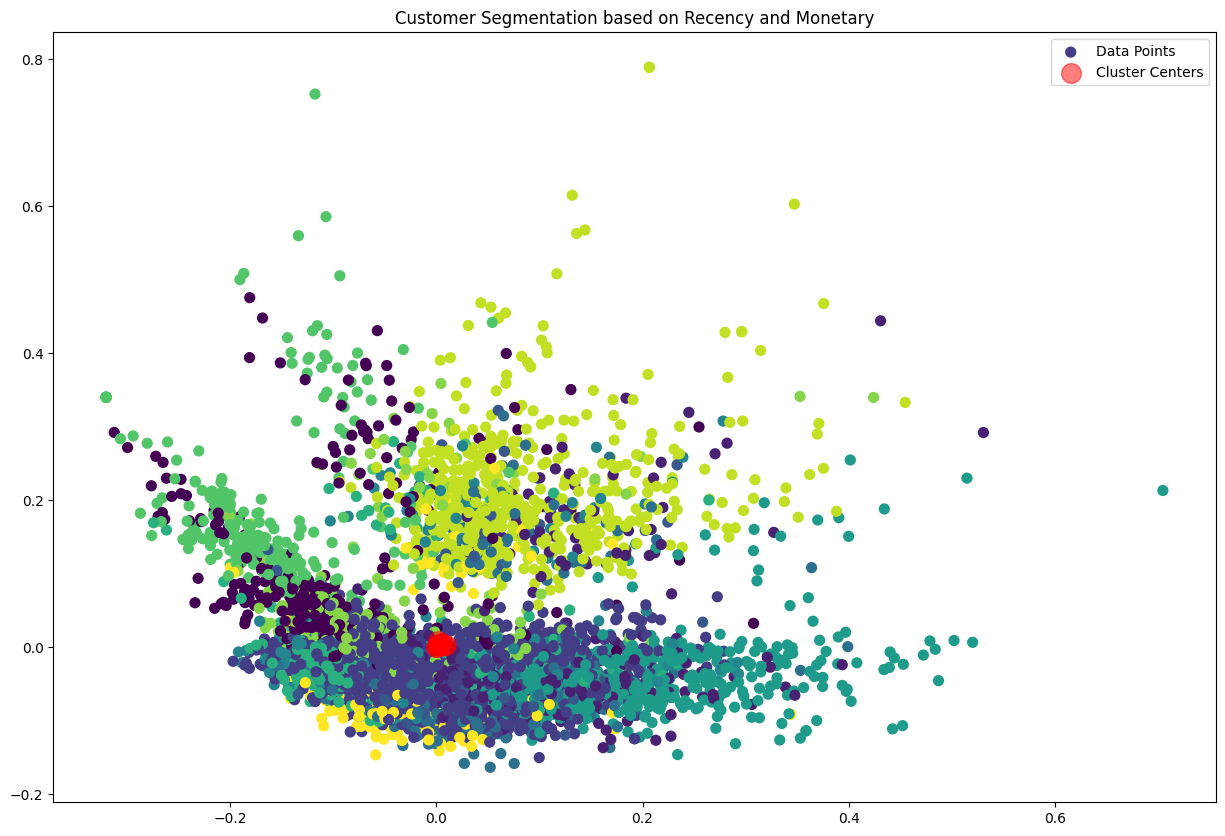

In [ ]:
# Replace them with the actual transformed data and cluster predictions
plt.figure(figsize=(15, 10))
plt.title('Customer Segmentation based on Recency and Monetary')

# Scatter plot of the transformed data colored by cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=y_predict, s=50, cmap='viridis', label='Data Points')

# Plotting cluster centers in red
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, label='Cluster Centers')

plt.legend()
plt.show()

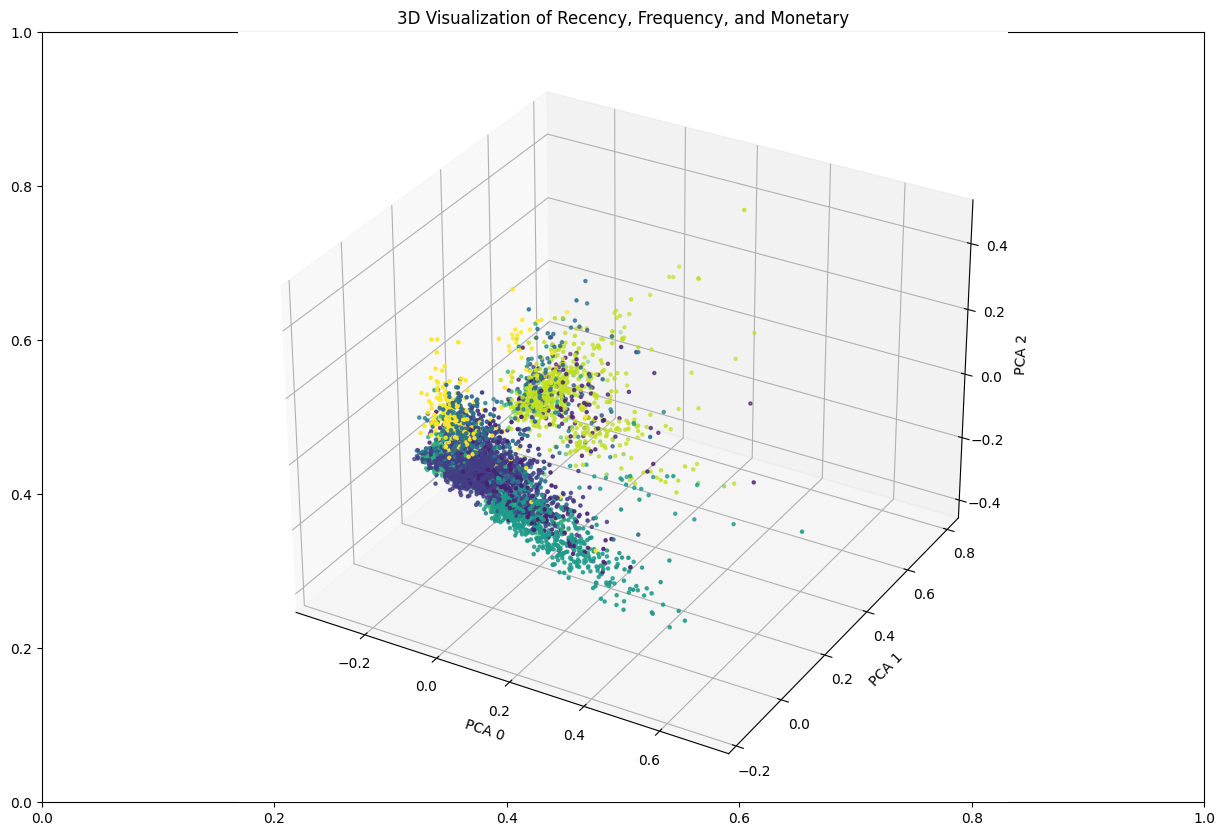

In [ ]:
# Replace them with the actual transformed data and cluster predictions
fig = plt.figure(figsize=(15, 10))
plt.title('3D Visualization of Recency, Frequency, and Monetary')

# Create a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Extract PCA components
xs = X[:, 0]
ys = X[:, 1]
zs = X[:, 2]

# Scatter plot in 3D colored by cluster assignments
ax.scatter(xs, ys, zs, s=5, c=y_predict, cmap='viridis', label='Data Points')

ax.set_xlabel('PCA 0')
ax.set_ylabel('PCA 1')
ax.set_zlabel('PCA 2')

plt.show()


In the end, From the 2D and 3D plot we can say that K-mean done not a bad job, but we cannot get into conclusion by plotting this PCA features.

ML Model - 2

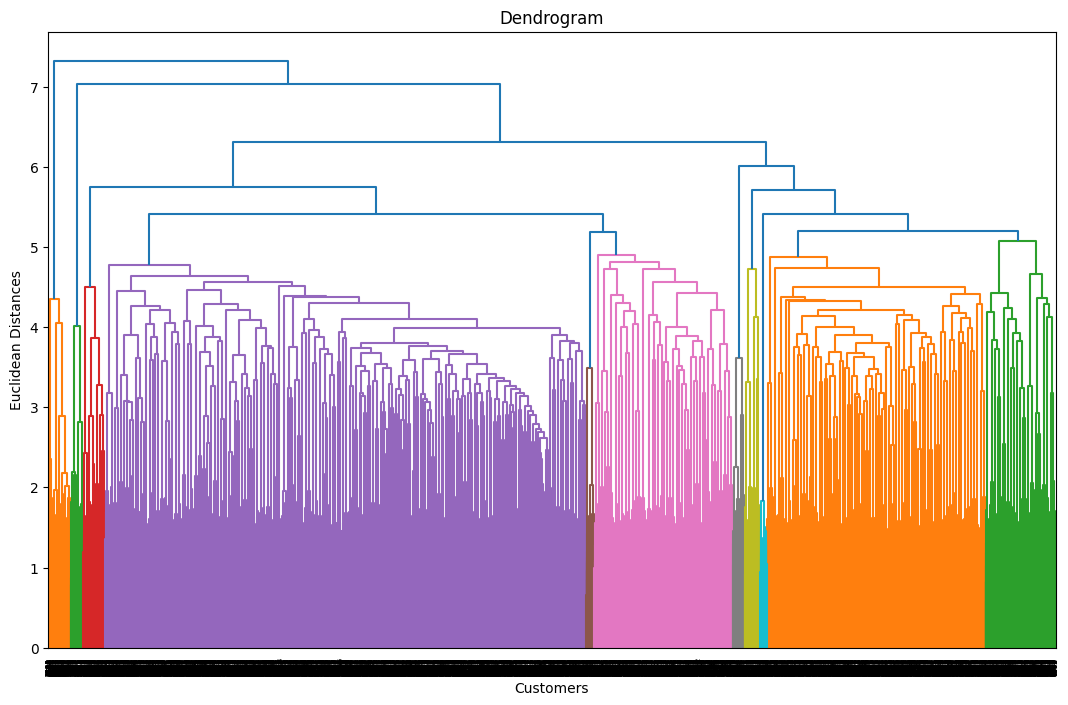

In [ ]:
import scipy.cluster.hierarchy as sch
# Create a dendrogram using the Ward linkage method
plt.figure(figsize=(13, 8))
dendrogram = sch.dendrogram(sch.linkage(description_feature_vector, method='ward'))

# Set plot title and axis labels
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Initialize AgglomerativeClustering with the specified number of clusters and linkage method
aggh = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')

# Fit the model to the feature vector
aggh.fit(description_feature_vector)

# Predict cluster assignments for each sample
y_hc = aggh.fit_predict(description_feature_vector)

In [ ]:
# Calculate Silhouette Coefficient
silhouette_coefficient = silhouette_score(description_feature_vector, y_hc, metric='euclidean')

# Print the Silhouette Coefficient
print("Silhouette Coefficient: %0.3f" % silhouette_coefficient)

Silhouette Coefficient: -0.006


ML Model - 3

In [ ]:
# Import necessary libraries
from sklearn.cluster import DBSCAN


# Define the range of epsilon (eps) and min_samples values to explore
eps_range = range(6, 12)  # Scale down by 100 for the range 0.06 - 0.11
minpts_range = range(5, 14)

# Lists to store silhouette scores and combinations of epsilon and min_samples
silhouette_scores = []
comb = []

# Iterate through different combinations of epsilon and min_samples
for k in eps_range:
    for j in minpts_range:
        # Set the model and its parameters
        model = DBSCAN(eps=k/100, min_samples=j)

        # Fit the model on the feature vectors (assuming 'description_feature_vector' is defined)
        clm = model.fit(description_feature_vector)

        # Calculate Silhouette Score and append to the list
        silhouette_scores.append(silhouette_score(description_feature_vector, clm.labels_, metric='euclidean'))

        # Store the combination of epsilon and min_samples for reference
        comb.append(str(k) + "|" + str(j))

# Now, 'silhouette_scores' contains silhouette scores for each combination,
# and 'comb' contains the corresponding epsilon and min_samples combinations.


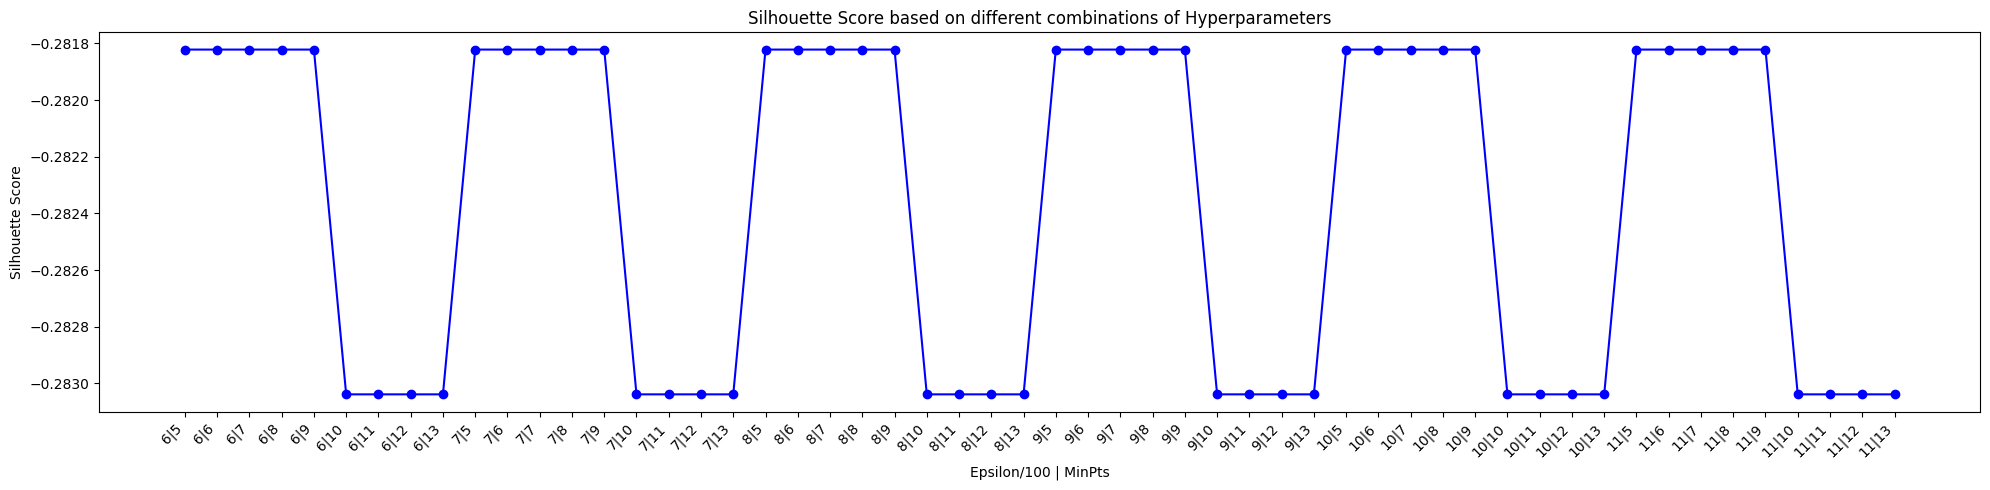

In [ ]:
# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(20, 5))
plt.plot(comb, silhouette_scores, 'bo-')  # 'bo-' represents blue color, round markers, and solid line
plt.xlabel('Epsilon/100 | MinPts')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score based on different combinations of Hyperparameters')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of axis labels
plt.show()

From the above figure, we can  see that eps=0.08 produce the highest scores. A few combination ended up having very similar scores, indicating that the clustering output for those combinations would also be similar.

In [ ]:
final_model = DBSCAN(eps=6/100, min_samples=5)
clm = final_model.fit(description_feature_vector)
print(silhouette_score(description_feature_vector, clm.labels_, metric='euclidean'))


-0.2818216033352313


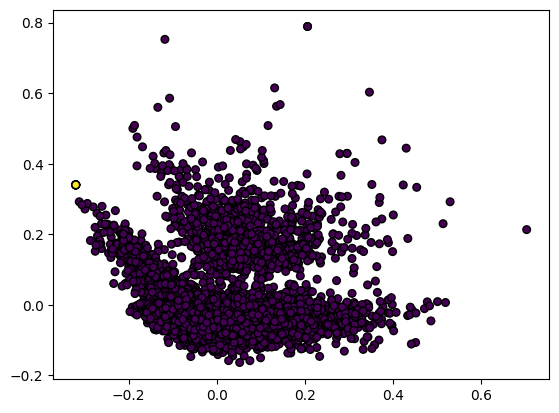

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=clm.labels_, cmap='viridis', marker='o', s=30, edgecolor='k')

1. Which Evalution metrics did you consider for positive business impact and why?

Silhouette score helped us to find the best model, and showed us to choose the best model among these.

2. Which ML model did you choose from the above created models as your final prediction model and why?

K-Means did better job in this dataset. It gives the insights that 12 is the perfect number of cluster, but in case of Aggloramative Clustering we saw that the 9 is the optimal cluster. Might be 9 is better, but I chose 12 in K-means, I got a better result with that using k-means. DBSCAN doesn't perform well in this dataset.

## Saving The Best Model

Save the best performing ML model in a pickle file or joblib file format for deployment process.


In [ ]:
# Assuming aggh is the model you want to save
filename = 'netflix_agglomerative_model.sav'
joblib.dump(aggh, filename)

['netflix_agglomerative_model.sav']

## Conclusion

We had given the problem of unsupervised clustering using Netflix Dataset. Initially we run some basic python code snippets to understand more about the data especially its shape, no.of features, datatypes, statical information etc.. Then in EDA part we analysed the data and found :

Netflix has more number of TV_shows and Movies belongs to United States.

Netflix acheived its peak in owning the number of contents between 2017 to 2020.

Netflix has more number of United States's Tv shows and Movies. Followed by India, which has highest number of movies and very low number of TV_shows comparing to the others.

Clustering:

In K-means which did better, said 12 should be the better cluster.In case of Agglomerative Clustering which too did best job in the Silhoutte score and using the dendogram I found that 9 should be the perfect cluster for this model. But finally using the Silhoutte score I concluded that K-Means did very nice job with 12 clusters

#Thank You